# Setup

In [1]:
# Import essential libraries
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical computations
import statsmodels.api as sm         # For statistical modeling and regression analysis
import seaborn as sns
import matplotlib.pyplot as plt      # For plotting graphs
from sklearn.impute import SimpleImputer  # For handling missing data
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Change the working directory to where the data file is located
df = pd.read_csv('C:/Users/uriar/OneDrive/Fátima Uriarte/Fati Files/7. Consultoria/datos_prueba_tecnica.csv')
df.head()

,iid,grupo,or,ctor,sexo,edad,inve,uso_app,tarjeta_debito,tipo_tarjeta,formacion
0,1,ctrl,0,0,0,38.296148,51019.88612,1,0,3,2
1,2,trat1,1,1,1,54.470670,63337.21881,1,0,3,4
2,3,trat2,1,1,1,35.713804,59901.62123,1,0,3,3
3,4,trat1,0,0,1,49.614319,50422.66906,0,0,3,3
4,5,trat1,0,0,1,41.816158,45562.30864,0,1,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iid             5000 non-null   int64  
 1   grupo           5000 non-null   object 
 2   or              5000 non-null   int64  
 3   ctor            5000 non-null   int64  
 4   sexo            5000 non-null   int64  
 5   edad            5000 non-null   float64
 6   inve            5000 non-null   float64
 7   uso_app         5000 non-null   int64  
 8   tarjeta_debito  5000 non-null   int64  
 9   tipo_tarjeta    5000 non-null   int64  
 10  formacion       5000 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 429.8+ KB


In [4]:
# Check the total number of missing values in each column
df.isnull().sum()

# Check if any column contains missing values
df.isnull().any()

iid               False
grupo             False
or                False
ctor              False
sexo              False
edad              False
inve              False
uso_app           False
tarjeta_debito    False
tipo_tarjeta      False
formacion         False
dtype: bool

# Data Analysis and Processing

In [5]:
# Generate descriptive statistics for numerical columns
categorical_columns = ['grupo', 'sexo', 'uso_app', 'tarjeta_debito', 'tipo_tarjeta', 'formacion' ]
numerical_columns = ['edad', 'inve']
df[numerical_columns].describe()

,edad,inve
count,5000.000000,5000.000000
mean,47.243290,49477.863491
std,11.147340,10913.533755
min,18.000000,20689.644810
25%,39.962743,41616.960403
50%,47.713001,48159.059205
75%,54.906638,57818.409473
max,70.000000,82603.697460


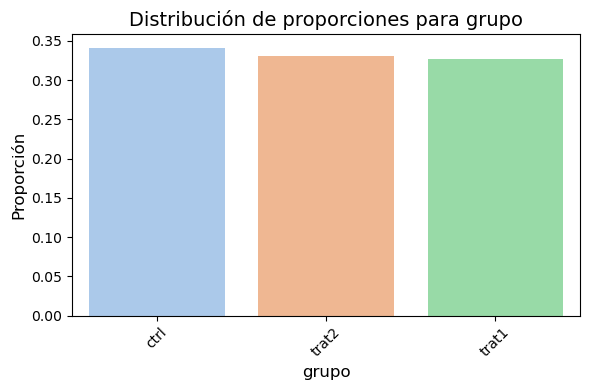

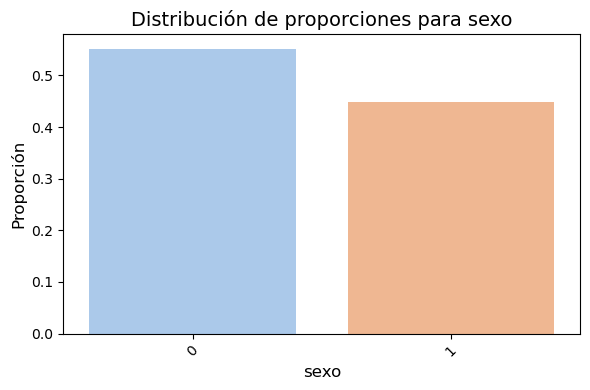

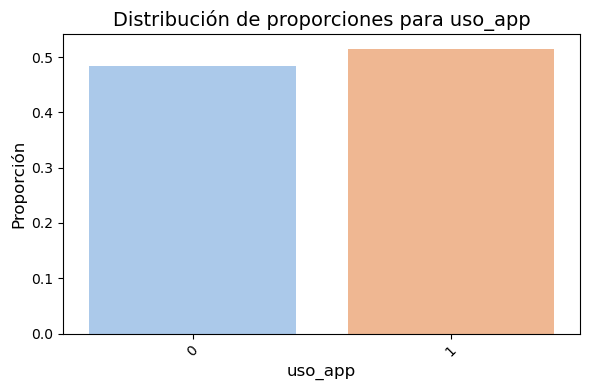

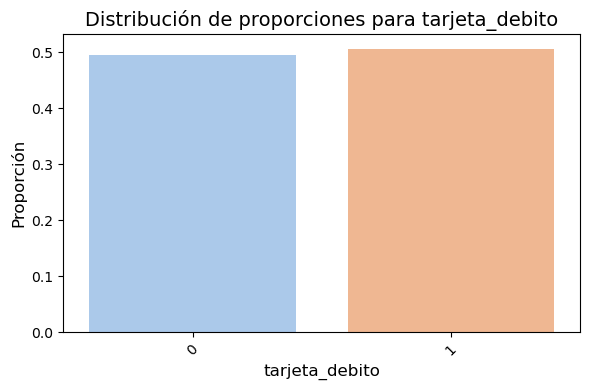

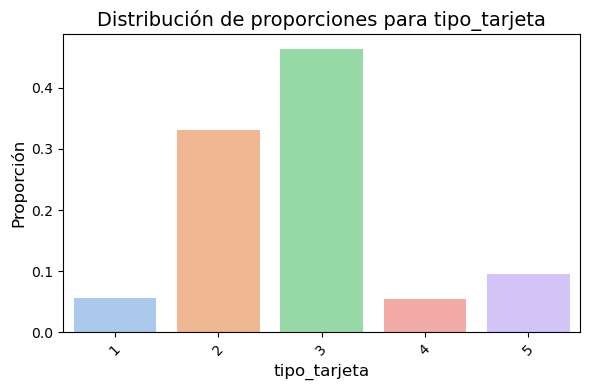

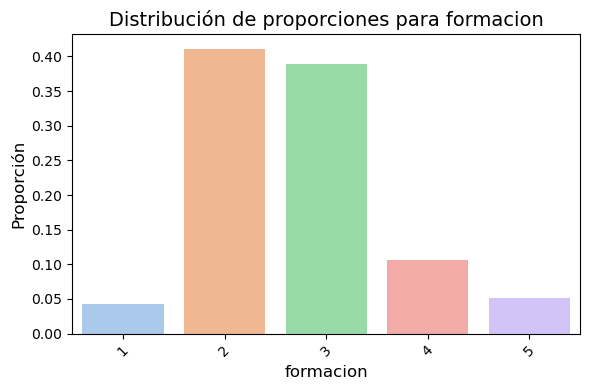

In [6]:
# Graficar proporciones para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(6, 4))  # Establecer tamaño de la figura
    # Calcular proporciones
    prop_data = df[col].value_counts(normalize=True).reset_index()
    prop_data.columns = [col, 'Proporción']
    sns.barplot(data=prop_data, x=col, y='Proporción', palette='pastel')
    plt.title(f'Distribución de proporciones para {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Asegurar que no haya sobreposición
    plt.show()


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

# Recorremos las columnas categóricas para evaluar balance
for column in categorical_columns[1:]:  # Excluye 'grupo' como variable independiente
    contingency_table = pd.crosstab(df['grupo'], df[column])  # Tabla de contingencia
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Variable: {column}")
    print(f"Chi2: {chi2}, p-value: {p_value}")
    if p_value > 0.05:
        print(f"No hay diferencias significativas en {column} entre los grupos.\n")
    else:
        print(f"Diferencias significativas encontradas en {column} entre los grupos.\n")


Variable: sexo
Chi2: 93.62812937205729, p-value: 4.665627169986872e-21
Diferencias significativas encontradas en sexo entre los grupos.

Variable: uso_app
Chi2: 4.546030380521726, p-value: 0.10300114335698463
No hay diferencias significativas en uso_app entre los grupos.

Variable: tarjeta_debito
Chi2: 1.1031380855200825, p-value: 0.576045261281285
No hay diferencias significativas en tarjeta_debito entre los grupos.

Variable: tipo_tarjeta
Chi2: 215.12308498106913, p-value: 4.126706768632088e-42
Diferencias significativas encontradas en tipo_tarjeta entre los grupos.

Variable: formacion
Chi2: 2.7393652299409608, p-value: 0.9496345090949024
No hay diferencias significativas en formacion entre los grupos.



In [8]:
from scipy.stats import f_oneway

# Recorremos las columnas numéricas para evaluar balance
for column in numerical_columns:
    group_data = [df[df['grupo'] == g][column] for g in df['grupo'].unique()]
    F, p_value = f_oneway(*group_data)
    print(f"Variable: {column}")
    print(f"F: {F}, p-value: {p_value}")
    if p_value > 0.05:
        print(f"No hay diferencias significativas en {column} entre los grupos.\n")
    else:
        print(f"Diferencias significativas encontradas en {column} entre los grupos.\n")


Variable: edad
F: 233.73965543218722, p-value: 9.113133437480856e-98
Diferencias significativas encontradas en edad entre los grupos.

Variable: inve
F: 533.3103963382991, p-value: 1.1730697313169189e-210
Diferencias significativas encontradas en inve entre los grupos.



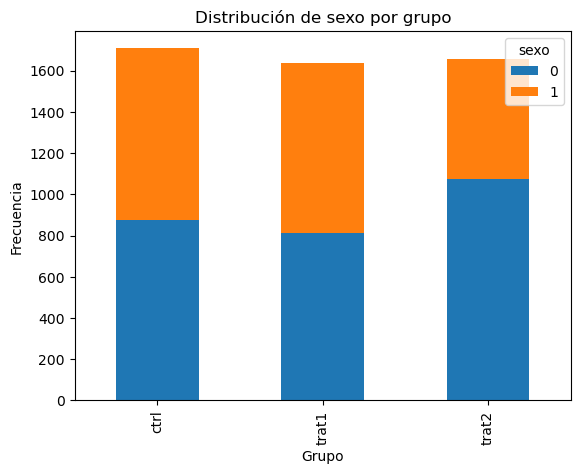

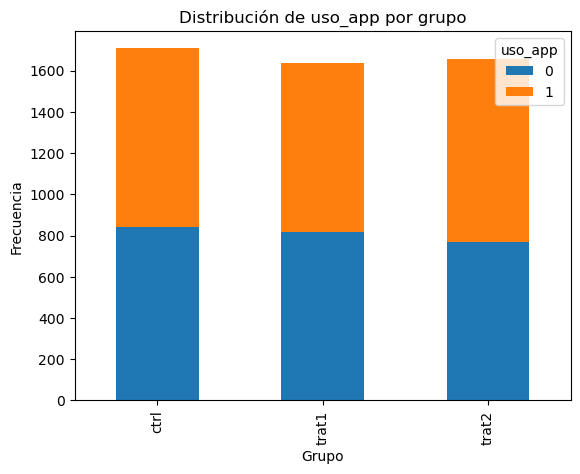

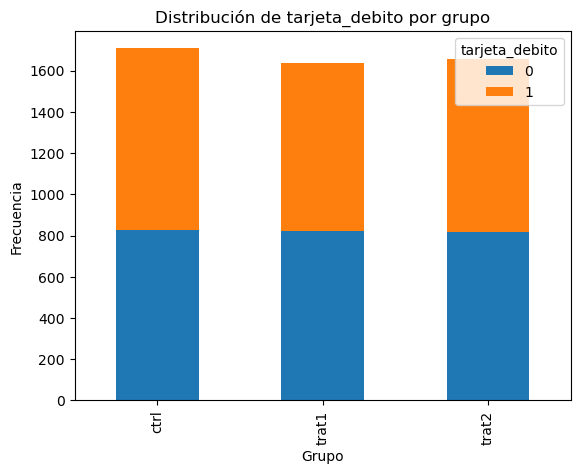

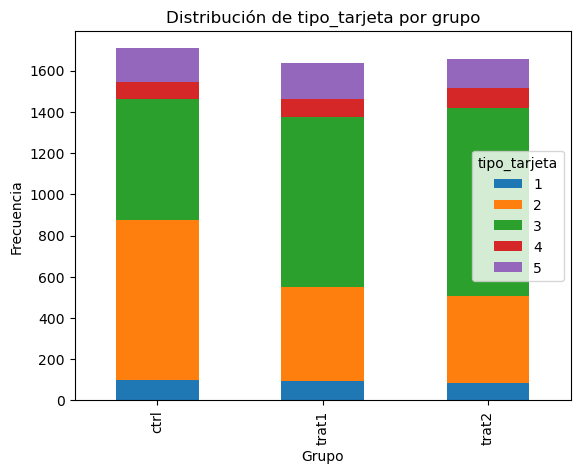

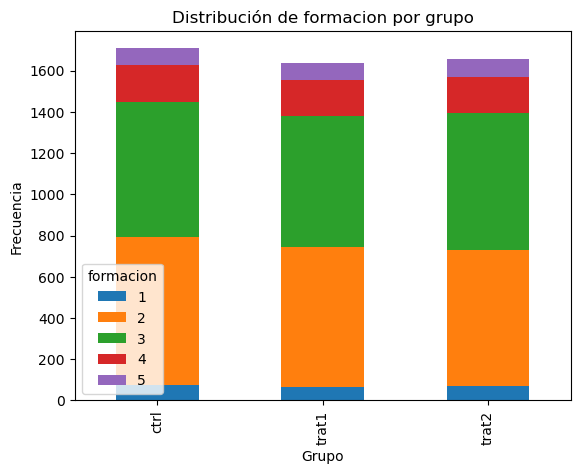

In [9]:
for column in categorical_columns[1:]:
    contingency_table = pd.crosstab(df['grupo'], df[column])
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f"Distribución de {column} por grupo")
    plt.xlabel('Grupo')
    plt.ylabel('Frecuencia')
    plt.show()


# Group differences: OR

In [18]:
descriptive_stats = df.groupby('grupo').agg(
    tasa_1=('or', 'mean'),
    count=('or', 'count')
).reset_index()

print(descriptive_stats)

   grupo    tasa_1  count
0   ctrl  0.288225   1707
1  trat1  0.607579   1636
2  trat2  0.607725   1657


In [19]:
from scipy.stats import chi2_contingency

# Tabla de contingencia (frecuencias observadas)
contingency_table = [
    descriptive_stats['count'] * descriptive_stats['tasa_1'],  # Aperturas
    descriptive_stats['count'] * (1 - descriptive_stats['tasa_1'])  # No aperturas
]

# Convertir a enteros (opcional)
contingency_table = [list(map(int, row)) for row in contingency_table]

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"P-value: {p_value}")
print(f"Grados de libertad: {dof}")


Chi2: 460.34775819296596
P-value: 1.088314536739719e-100
Grados de libertad: 2


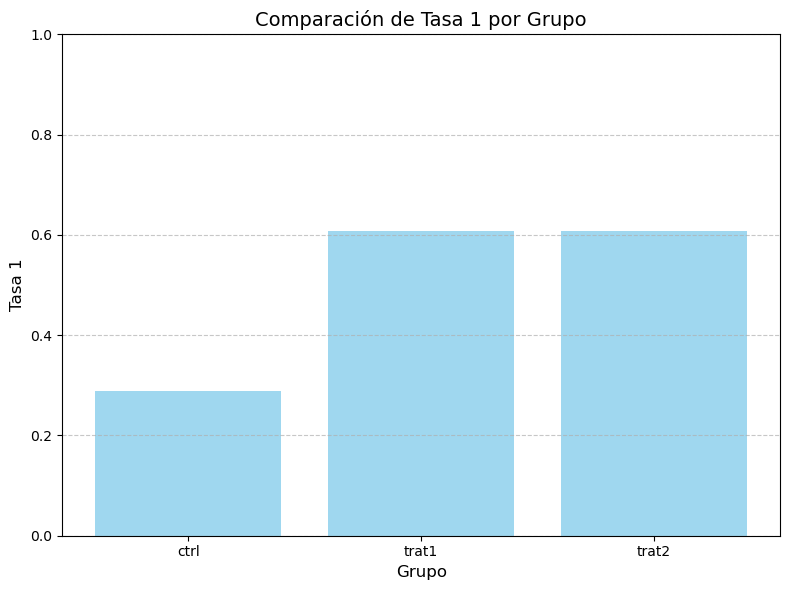

In [20]:
# Gráfico de barras para comparar tasa_1 por grupo
plt.figure(figsize=(8, 6))
plt.bar(descriptive_stats['grupo'], descriptive_stats['tasa_1'], color='skyblue', alpha=0.8)

# Etiquetas y título
plt.title('Comparación de Tasa 1 por Grupo', fontsize=14)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Tasa 1', fontsize=12)
plt.ylim(0, 1)  # Rango entre 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Group Differences: CTOR

In [21]:
descriptive_stats = df.groupby('grupo').agg(
    tasa_1=('ctor', 'mean'),
    count=('ctor', 'count')
).reset_index()

print(descriptive_stats)

   grupo    tasa_1  count
0   ctrl  0.087288   1707
1  trat1  0.352689   1636
2  trat2  0.488835   1657


In [22]:
from scipy.stats import chi2_contingency

# Tabla de contingencia (frecuencias observadas)
contingency_table = [
    descriptive_stats['count'] * descriptive_stats['tasa_1'],  # Aperturas
    descriptive_stats['count'] * (1 - descriptive_stats['tasa_1'])  # No aperturas
]

# Convertir a enteros (opcional)
contingency_table = [list(map(int, row)) for row in contingency_table]

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"P-value: {p_value}")
print(f"Grados de libertad: {dof}")


Chi2: 661.2568880886738
P-value: 2.569751873077988e-144
Grados de libertad: 2


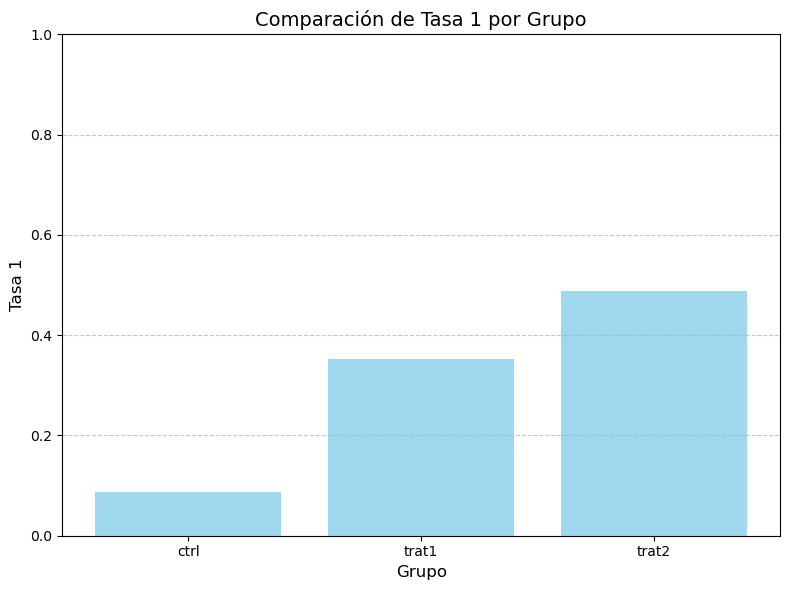

In [23]:
# Gráfico de barras para comparar tasa_1 por grupo
plt.figure(figsize=(8, 6))
plt.bar(descriptive_stats['grupo'], descriptive_stats['tasa_1'], color='skyblue', alpha=0.8)

# Etiquetas y título
plt.title('Comparación de Tasa 1 por Grupo', fontsize=14)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Tasa 1', fontsize=12)
plt.ylim(0, 1)  # Rango entre 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Logit: Apertura Email

In [29]:
# Variable dependiente
df.rename(columns={'or': 'or_outcome'}, inplace=True)
dependent_var = 'or_outcome'

# Variables numéricas
numerical_vars =  ['edad', 'inve']

# Variables categóricas
categorical_vars = ['grupo', 'sexo', 'uso_app', 'tarjeta_debito', 'tipo_tarjeta', 'formacion']

In [30]:
# Creación de Fórmula para el Modelo
formula = f"{dependent_var} ~ " + " + ".join(
    [f"C({var})" for var in categorical_vars] + numerical_vars
)

In [31]:
# Modelo Logístico
modelo = smf.logit(formula=formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.574873
         Iterations 5


In [32]:
# Resultados del Modelo
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:             or_outcome   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4984
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.1706
Time:                        11:20:51   Log-Likelihood:                -2874.4
converged:                       True   LL-Null:                       -3465.7
Covariance Type:            nonrobust   LLR p-value:                8.494e-243
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.3334      0.328     -7.122      0.000      -2.976      -1.691
C(grupo)[T.trat1]          0.9618      0.079     12.142      0.000       0.807       1.117
C(gr

In [33]:
# Calcular Odds Ratios
odds_ratios = np.exp(modelo.params)
print("\nOdds Ratios:")
print(odds_ratios)


Odds Ratios:
Intercept                 0.096969
C(grupo)[T.trat1]         2.616358
C(grupo)[T.trat2]         1.662978
C(sexo)[T.1]              0.806327
C(uso_app)[T.1]           1.010070
C(tarjeta_debito)[T.1]    1.057151
C(tipo_tarjeta)[T.2]      0.864497
C(tipo_tarjeta)[T.3]      1.299566
C(tipo_tarjeta)[T.4]      0.902060
C(tipo_tarjeta)[T.5]      1.042666
C(formacion)[T.2]         0.848644
C(formacion)[T.3]         0.886579
C(formacion)[T.4]         0.897114
C(formacion)[T.5]         0.749274
edad                      0.972977
inve                      1.000066
dtype: float64


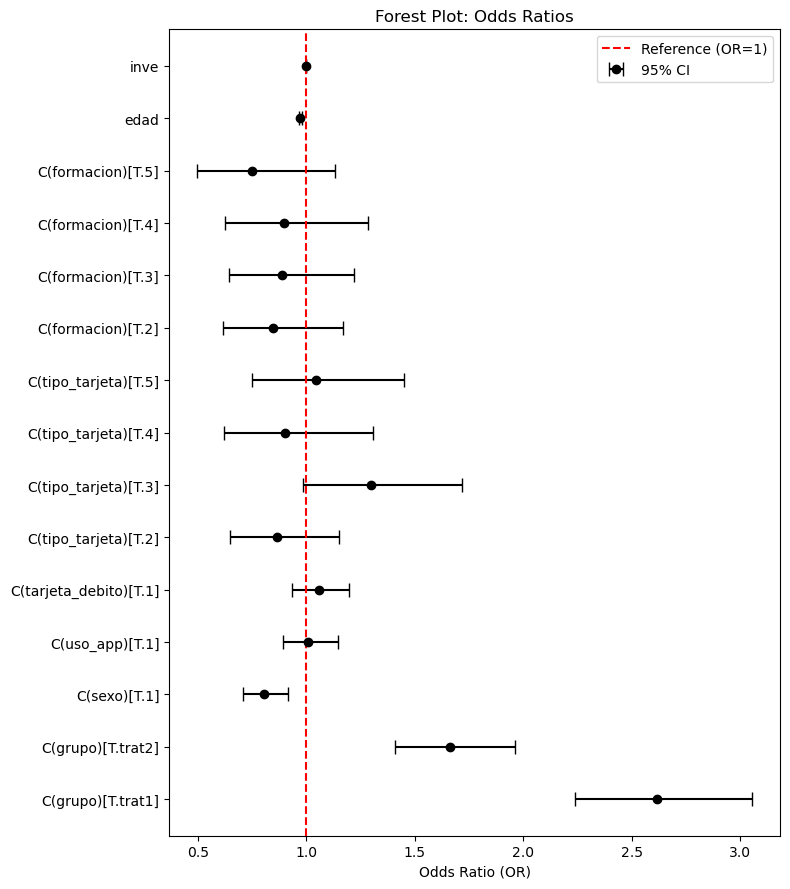

In [34]:
# Extract coefficients and calculate OR and CI
summary_table = modelo.summary2().tables[1]
summary_table['OR'] = np.exp(summary_table['Coef.'])
summary_table['CI_lower'] = np.exp(summary_table['Coef.'] - 1.96 * summary_table['Std.Err.'])
summary_table['CI_upper'] = np.exp(summary_table['Coef.'] + 1.96 * summary_table['Std.Err.'])

# Exclude intercept for plotting
summary_table = summary_table.iloc[1:]

# Forest plot
fig, ax = plt.subplots(figsize=(8, len(summary_table) * 0.6))
y_pos = range(len(summary_table))

# Plot OR and confidence intervals
ax.errorbar(
    summary_table['OR'], y_pos, xerr=[
        summary_table['OR'] - summary_table['CI_lower'],
        summary_table['CI_upper'] - summary_table['OR']
    ], fmt='o', color='black', capsize=5, label='95% CI'
)

# Add reference line at OR=1
ax.axvline(x=1, color='red', linestyle='--', label='Reference (OR=1)')

# Add labels and titles
ax.set_yticks(y_pos)
ax.set_yticklabels(summary_table.index)
ax.set_xlabel('Odds Ratio (OR)')
ax.set_title('Forest Plot: Odds Ratios')
ax.legend()

plt.tight_layout()
plt.show()


# Logit Click Rate

In [45]:
filtered_data=df[(df['or_outcome']==1 ) & (df['grupo']!='ctrl')]

In [46]:
# Variable dependiente
dependent_var = 'ctor'

# Variables numéricas
numerical_vars =  ['edad', 'inve']

# Variables categóricas
categorical_vars = ['grupo', 'sexo', 'uso_app', 'tarjeta_debito', 'tipo_tarjeta', 'formacion']

In [47]:
# Creación de Fórmula para el Modelo
formula = f"{dependent_var} ~ " + " + ".join(
    [f"C({var})" for var in categorical_vars] + numerical_vars
)

In [48]:
# Modelo Logístico
modelo = smf.logit(formula=formula, data=filtered_data).fit()

Optimization terminated successfully.
         Current function value: 0.150359
         Iterations 9


In [49]:
# Resultados del Modelo
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                   ctor   No. Observations:                 2001
Model:                          Logit   Df Residuals:                     1986
Method:                           MLE   Df Model:                           14
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.7561
Time:                        11:41:56   Log-Likelihood:                -300.87
converged:                       True   LL-Null:                       -1233.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -24.1493      1.758    -13.740      0.000     -27.594     -20.704
C(grupo)[T.trat2]         -0.9406      0.267     -3.519      0.000      -1.465      -0.417
C(se

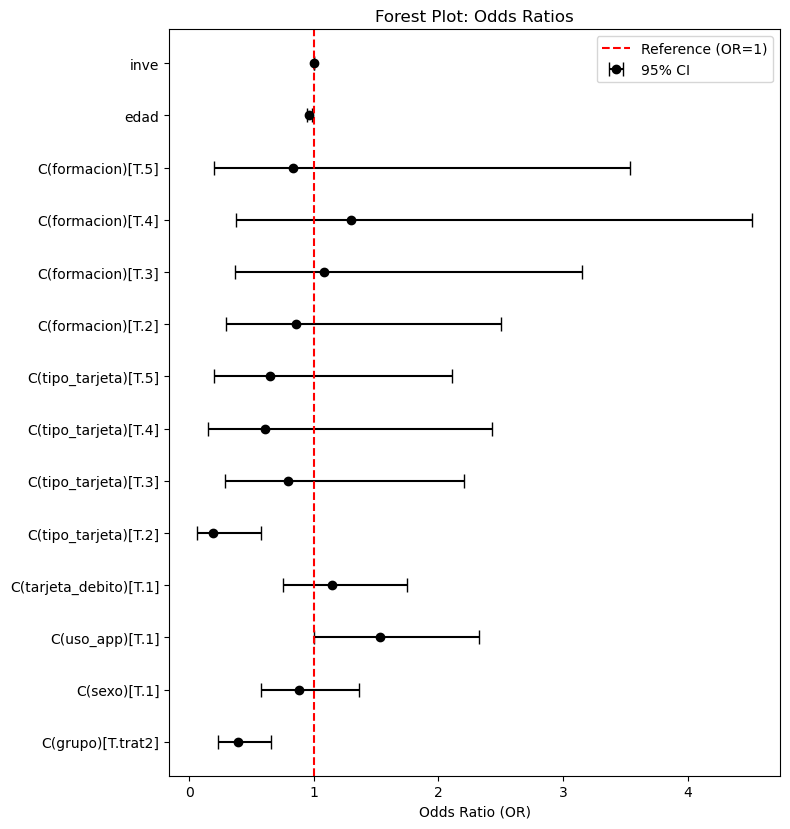

In [50]:
# Extract coefficients and calculate OR and CI
summary_table = modelo.summary2().tables[1]
summary_table['OR'] = np.exp(summary_table['Coef.'])
summary_table['CI_lower'] = np.exp(summary_table['Coef.'] - 1.96 * summary_table['Std.Err.'])
summary_table['CI_upper'] = np.exp(summary_table['Coef.'] + 1.96 * summary_table['Std.Err.'])

# Exclude intercept for plotting
summary_table = summary_table.iloc[1:]

# Forest plot
fig, ax = plt.subplots(figsize=(8, len(summary_table) * 0.6))
y_pos = range(len(summary_table))

# Plot OR and confidence intervals
ax.errorbar(
    summary_table['OR'], y_pos, xerr=[
        summary_table['OR'] - summary_table['CI_lower'],
        summary_table['CI_upper'] - summary_table['OR']
    ], fmt='o', color='black', capsize=5, label='95% CI'
)

# Add reference line at OR=1
ax.axvline(x=1, color='red', linestyle='--', label='Reference (OR=1)')

# Add labels and titles
ax.set_yticks(y_pos)
ax.set_yticklabels(summary_table.index)
ax.set_xlabel('Odds Ratio (OR)')
ax.set_title('Forest Plot: Odds Ratios')
ax.legend()

plt.tight_layout()
plt.show()
